In [1]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
import time

# Applied Math 10: Computing for Science and Engineering


## Lab 8 : Elementary - Second-order Ordinary Differential Equations (ODEs)

**Spring 2020**<br/>
<br>
**Instructors**: K. Indireshkumar (Kumar)<br/>
**Material**: K. Indireshkumar (Kumar)

### Learning Goals of Lab 
In this lab, we continue the work started in lecture 8. Our objective in this lab is to:
- write python functions for the Euler and Runge-Kutta 4th order (RK) methods of solving second order ODEs discussed in lecture 8
- solve some interesting and practical second order ODEs

## Second-order differential equations


A second-order ODE is then given by:

$$ \frac{d^2 u}{dx^2} = g(x,u,u') $$

where $g(u,u',x)$ is a given function of the function $u$, its first derivative $u'=du/dx$, and the variable $x$.  We also need to know the value of the function $u(x)$ and its derivative $u'(x)$ for some specific value of $x$, so that we can try to solve for the function $u(x)$ that satisfies this equation. 

___________________________________________________________________________________________________________________________

### The Euler's method: Function for Euler's method (via the three-point formula for derivative)

As presented in Lecture 8, the formulas for the Euler (three-point) method  are:

$$u'(x_{n+1})=u'(x_{n-1}) + 2 \; \Delta x \; g(x_n, u(x_n), u'(x_n)) ~~~~ (1)$$

$$u(x_{n+1})=u(x_{n-1}) + 2 \; \Delta x \; u'(x_n) ~~~~~~~~~~~~~~~~~~~~~~~~~~~ (2) $$

with formulas for $x_1$ as:

$$u'(x_1) = u'(x_0) + \Delta x \cdot g(x_0, u_0, u'_0) ~~~~~~~~~~~~~~~~~~~~~~(3)$$

$$u(x_1) = u(x_0) + \Delta x \; u'(x_0) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ (4)$$

We will code these formulas with the *notation* replacements $\bf{u'}$ by $\bf{ud}$, $\bf{u}$ by $\bf{uf}$, and $\bf{g(x,u,u')}$ by $\bf{gf}$.

**Exercise 1**: "Translate" the Euler formulas into code by completing the designated sections.

In [22]:
#Function to integrate a second-order ODE 
#Euler's method with three point formula for derivative
#-------------------------------------------------------------------------
#Note: We are using the following replacements in the formulas (1) - (4):
#    ud for u', uf for u, gf for g
#---------------------------------------------------------------------------

def ode2_euler(Nx,xmin,xmax,uf0,ud0):
    #Nx: Number of points to be used for integration.
    #xmin, xmax: Integration limits
    #uf0: Intial condition on uf at xmin
    #ud0: Initial condition on ud at xmin

    x = np.linspace(xmin, xmax, Nx)
    dx = x[1] - x[0]
    dx2=2.0*dx

    uf=np.zeros(Nx)
    ud=np.zeros(Nx)
    
    #Initial (boundary) conditions
    uf[0]=uf0
    ud[0]=ud0
    #We will write a separate python function for 
    # gf(x[n],uf[n],ud[n]) later. The initial value will be:

    gf0=gf(x[0],uf[0],ud[0])
    
    #Formulas (3) and (4) with above mentioned replacements:
    ud[1]=ud[0]+dx*gf0
    uf[1]=uf[0]+dx*ud[0]
    
    for n in range(1, Nx-1):
    # Fill in the code for ud[n+1] and uf[n+1]; 
    # Refer to formulas (1) and (2) shown above with the appropriate notation replacements
        
        ud[n+1]=ud[n-1]+dx2*gf(x[n],uf[n],ud[n])
        uf[n+1]=uf[n-1]+dx2*ud[n]
    
    return uf   

___________________________________________________________________________________________________________________________

### The Runge-Kutta method: Function for the Runge-Kutta 4th order method
The formulas from lecture 8:

$$k^{(1)}_n =f(x_n,u_n,v_n), \; \; \; l^{(1)}_n =g(x_n,u_n,v_n) ~~~~~~(5)$$

$$k^{(2)}_n=f(x_n+\frac{h}{2},u_n+\frac{h k^{(1)}_n}{2}, v_n+\frac{h l^{(1)}_n}{2} ),\; \; \; 
l^{(2)}_n=g(x_n+\frac{h}{2},u_n+\frac{h k^{(1)}_n}{2}, v_n+\frac{h l^{(1)}_n}{2} )~~~~~~(6)$$ 

$$k^{(3)}_n=f(x_n+\frac{h}{2},u_n+\frac{h k^{(2)}_n}{2},v_n+\frac{h l^{(2)}_n}{2}  ), \; \; \; l^{(3)}_n=g(x_n+\frac{h}{2},u_n+\frac{h k^{(2)}_n}{2},v_n+\frac{h l^{(2)}_n}{2}  )~~~~~~(7)$$

$$k^{(4)}_n = f(x_n+h,u_n+h k^{(3)}_n, v_n+h l^{(3)}_n), \; \; \; 
l^{(4)}_n = g(x_n+h,u_n+h k^{(3)}_n, v_n+h l^{(3)}_n)
~~~~~~(8)$$ 

$$u_{n+1} = u_n + \frac{h}{6} \left [ k^{(1)}_n + 2 \; k^{(2)}_n + 2 \; k^{(3)}_n + k^{(4)}_n 
\right ], \; \; \; 
v_{n+1} = v_n + \frac{h}{6} \left [ l^{(1)}_n + 2 \; l^{(2)}_n + 2 \; l^{(3)}_n + l^{(4)}_n 
\right ]
~~(9)$$

We will code this with the following *notation* substitutions: $\bf{h}$ by $\bf{dx}$, $\bf{u}$ by $\bf{uf}$, $\bf{v}$ by $\bf{vf}$, $\bf{g(x,u,u')}$ by $\bf{gf}$, $\bf{f(x,u,u')}$ by $\bf{ff}$, $\bf{k_n^{(p)}}$ by $\bf{knp}$, $\bf{l_n^{(p)}}$ by $\bf{lnp}$ where $\bf{p}$ takes the values 1, 2, 3, and 4.


**Exercise 2**: "Translate" the Runge-Kutta formulas into code by completing the designated sections.

In [20]:
#Function to find the solution of second order ODE with
#Runge-Kutta 4th order method (RK4)

def ode2_rk4(Nx, xmin, xmax, uf0, vf0):
    #Diff eqns of form: 
    #                 d(uf)/dx=ff(x,uf,vf)
    #                 d(vf)/dx=gf(x,uf,vf)
    #Nx: Number of points to be used for integration
    #xmin, xmax: Initial and final values of the independent variable (x)
    #uf0, vf0: Initial (boundary) values of the dependent variables at x=xmin
     
    x = np.linspace(xmin, xmax, Nx)
    dx = x[1] - x[0] # dx = h (lecture 8)
    
    uf = np.zeros(Nx) # uf = u (lecture 8)
    vf = np.zeros(Nx) # vf = v (lecture 8)
    
    #Initial conditions on u and v
    uf[0] = uf0
    vf[0] = vf0
    
    #We define two variables that minimize the repetitive computations
    #You can use these below while coding
    
    dxovr6 = dx / 6.0
    dxovr2 = dx * 0.5

    for n in range(Nx - 1):
        #We need to suppy the functions ff(x,uf,vf) and gf(x,uf,vf)
        # These are the same as f(x,u,v) and g(x,u,v).
        
        #Forumula (5) can be coded as:
        kn1 = ff(x[n], uf[n], vf[n]) 
        ln1 = gf(x[n], uf[n], vf[n])

        #Forumula (6) can be coded as

        kn2 = ff(x[n] + dxovr2, uf[n] + dxovr2 * kn1, vf[n]+dxovr2 * ln1)
        ln2 = gf(x[n] + dxovr2, uf[n] + dxovr2 * kn1, vf[n]+dxovr2 * ln1)

        # Code formulas (7), (8), and (9) shown above with the appropriate notation substitutions
        #-------------------------------------------------------------------- 
        # Equation 7
        kn3 = ff(x[n] + dxovr2, uf[n] + dxovr2 * kn2, vf[n]+dxovr2 * ln2)
        ln3 = gf(x[n] + dxovr2, uf[n] + dxovr2 * kn2, vf[n]+dxovr2 * ln2)
        # Equation 8
        kn4 = ff(x[n] + dx, uf[n] + dx * kn3, vf[n]+dx * ln3)
        ln4 = gf(x[n] + dx, uf[n] + dx * kn3, vf[n]+dx * ln3)
        # Equation 9
        uf[n+1] = uf[n] + dxovr6 * (kn1 + kn2 * 2. + kn3 * 2. + kn4)
        vf[n+1] = vf[n] + dxovr6 * (ln1 + ln2 * 2. + ln3 * 2. + ln4)
        
        #-------------------------------------------------------------------
    return uf

__________________________________________________________________________________________________________________________

### Exercise: Solve the eigenfunction problem 
We will now illustrate how to use the Euler and RK functions to solve the equation (eigenvalue problem):

$$ \frac{d^2 u}{dx^2} = -a^2 u $$

where $a$=2.

Note that this problem comprises three parts:
1. We need to supply the functions `ff` (needed by RK) and `gf` (needed by both RK and Euler). You identify these by casting the ODE into a form discussed in lecture 8.
2. We also need to supply the boundary (initial) conditions. 
3. We need to code the exact solution for comparison.

Steps (1) and (2) will be common to all problems. Step (3) is needed only if you know the exact solution or, at least, an approximation to the exact solution.

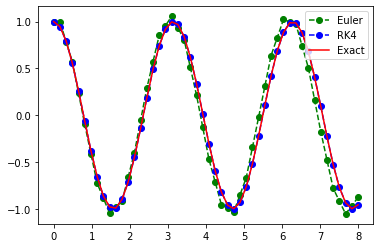

In [23]:
# Redo the sine/cosine function with the RK method
# g(x,u,v) = -a**2 u, f(x,u,v) = v
# Apply this for Nx=50, xmax=8.0, and compare to previous case with the same parameters. 

Nx=50
xmin=0.0
xmax=8.0
x=np.linspace(xmin,xmax,Nx)


a=2.0
Afact=1.0

#uf0=0.0
#ud0=Afact*a
uf0=Afact
ud0=0.0

#Define the functions gf and ff. 
#These are called from within the Euler and RK functions. They need to have the
#same names as used in those functions.They need to have the same number of arguments.
#The variable names can be different.

def gf(x,uf,ud):
    a=2.0
    asq=a**2
    return -asq*uf

def ff(x,uf,ud):
    return ud

# The true (exact) solution in terms of the boundary conditions
Aconst=ud0/a
Bconst=uf0
utrue=Aconst*np.sin(a*x)+Bconst*np.cos(a*x)

# Find the solution using Euler method

ufn=ode2_euler(Nx,xmin,xmax,uf0,ud0)

# Find the solution using the Runge-Kutta (4th order) method

uf2f=ode2_rk4(Nx, xmin, xmax, uf0, ud0)

#Compare the solutions

plt.plot(x,ufn,'go--', label="Euler")               
plt.plot(x,uf2f,'bo--', label="RK4")
plt.plot(x,utrue,'r-', label="Exact")
plt.legend()
plt.show()


___________________________________________________________________________________________________________________________

## Problem 1
The following equation arises while describing steady-state heat conduction across a cylindrical pipe wall. The inside of the pipe ($x_0=0.1$) is held at 373 K and the outside at 300 K. Solve the following equation, using the Runge-Kutta method:

$$\frac{d^2 u}{dx^2}=-\frac{1}{x}\frac{du}{dx}$$

over the domain $0.1\le x\le 0.5$. With $x_0=0.1$, also given are:

$$u(x_0)=373.0$$ and $$\frac{du}{dx}(x_0)=-453.6$$ Compare it with the 
exact solution:

$$utrue=373.0-45.36*\ln\left (\frac{x}{x_{0}}\right ) $$

where $\ln$ is the natural logarithm.

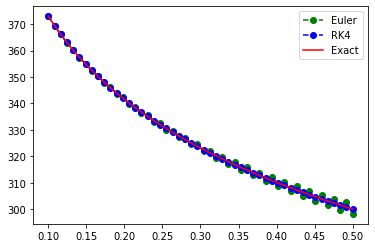

In [27]:

Nx=50
xmin=0.1
xmax=0.5
x=np.linspace(xmin,xmax,Nx)

uf0= 373.0
ud0=-453.6

#Define the functions gf and ff. 
#These are called from within the Euler and RK functions. They need to have the
#same names as used in those functions.They need to have the same number of arguments.
#The variable names can be different.

def gf(x,uf,ud):
    return -(1/x) * ud

def ff(x,uf,ud):
    return ud

# The true (exact) solution in terms of the boundary conditions
utrue = 373.0 - 45.36 * np.log(x / x[0])

# Find the solution using Euler method

ufn=ode2_euler(Nx,xmin,xmax,uf0,ud0)

# Find the solution using the Runge-Kutta (4th order) method

uf2f=ode2_rk4(Nx, xmin, xmax, uf0, ud0)

#Compare the solutions

plt.plot(x,ufn,'go--', label="Euler")               
plt.plot(x,uf2f,'bo--', label="RK4")
plt.plot(x,utrue,'r-', label="Exact")
plt.legend()
plt.show()



## Problem 2

Consider the following equation:
\begin{equation}
\frac{d^2x}{dt^2} =A+B x+ C \frac{dx}{dt} + D\left ( \frac{dx}{dt}\right )^2 ~~~~~~~~~~~~~~~~~~~~~ (10)
\end{equation}
where $A$, $B$, $C$, and $D$ are constants. <br>
[Note: You have encountered a simplified form of this equation before. For $A=C=D=0$ and $B=-4$, it is the eigenfunction problem you encountered earlier.]

The tasks for this problem are the following:

(a) Write code (functions) for $g(x,u,v)$ and $f(x,u,v)$. <br><br>
(b) Use the functions coded in part (a), and solve Eq. (10) for  $A=C=D=0$ and $B=-4$, and the boundary condition of the eigenfunction problem solved above (Exercise). <br><br>
(c) Show that the solution obtained in part (b) is the same with the solution obtained in the eigenfunction problem (Exercise). This will serve as a check for the functions coded in part (a) of this problem.

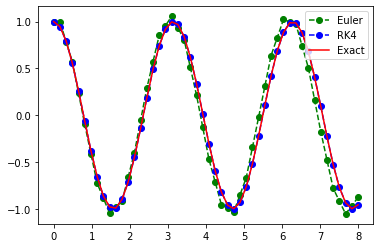

In [45]:
# Redo the sine/cosine function with the RK method
# g(x,u,v) = -a**2 u, f(x,u,v) = v
# Apply this for Nx=50, xmax=8.0, and compare to previous case with the same parameters. 

Nx=50
xmin=0.0
xmax=8.0
x=np.linspace(xmin,xmax,Nx)

a=2.0
Afact=1.0

#uf0=0.0
#ud0=Afact*a
uf0=Afact
ud0=0.0

#Define the functions gf and ff. 
#These are called from within the Euler and RK functions. They need to have the
#same names as used in those functions.They need to have the same number of arguments.
#The variable names can be different.

def gf(x,uf,ud):
    A = 0
    B = -4
    C = 0
    D = 0
    return A + (B * uf) + (C * ud) + (D * (ud**2))

def ff(x,uf,ud):
    return ud

# The true (exact) solution in terms of the boundary conditions
Aconst=ud0/a
Bconst=uf0
utrue=Aconst*np.sin(a*x)+Bconst*np.cos(a*x)

# Find the solution using Euler method

ufn=ode2_euler(Nx,xmin,xmax,uf0,ud0)

# Find the solution using the Runge-Kutta (4th order) method

uf2f=ode2_rk4(Nx, xmin, xmax, uf0, ud0)

#Compare the solutions

plt.plot(x,ufn,'go--', label="Euler")               
plt.plot(x,uf2f,'bo--', label="RK4")
plt.plot(x,utrue,'r-', label="Exact")
plt.legend()
plt.show()



## Problem 3

In Lab 4, you solved for the motion of a mass $m$ attached to a spring encountering some friction using Taylor expansion. The equation you considered was of the form:
$$ m\frac{d^2x}{dt^2} = -kx -c \frac{dx}{dt}$$
where $m=1$, $k=1$, $c=0.5$, the duration of motion was 50 seconds ($0 \le t \le 50$), and you solved for the position $x(t)$ of the mass.  

In this Lab, you will solve the above differential equation using the Euler and RK functions you have developed.

The initial conditions are $x(0)=2$ and $\frac{dx}{dt} (0)=0$. Use Nx=1000. 

**Hint**: Utilize the method and functions developed in Problem 2. "Map" this problem's equation to Eq. (10) by identifying the proper constants (A, B, C, D).

**Important note on variables' notation**: The Euler and RK methods were explained with the independent variable $x$ and dependent variable $u$. In this problem, the independent variable is time $t$ and the dependent variable (the position) is $x$. Regarding notation, in your code, you can continue using $x$ and $u$ or switch to $t$ and $x$.


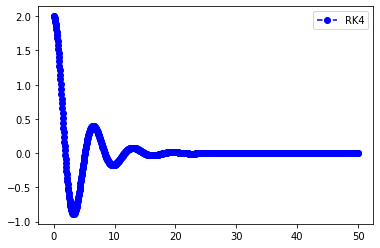

In [56]:
# Redo the sine/cosine function with the RK method
# g(x,u,v) = -a**2 u, f(x,u,v) = v
# Apply this for Nx=50, xmax=8.0, and compare to previous case with the same parameters. 

Nx=1000
xmin=0.0
xmax=50.0
x=np.linspace(xmin,xmax,Nx)

Afact=2.0

#uf0=0.0
#ud0=Afact*a
uf0=Afact
ud0=0.0

#Define the functions gf and ff. 
#These are called from within the Euler and RK functions. They need to have the
#same names as used in those functions.They need to have the same number of arguments.
#The variable names can be different.

def gf(x,uf,ud):
    A = 0
    B = -1
    C = -.5
    D = 0
    return A + (B * uf) + (C * ud) + (D * (ud**2))

def ff(x,uf,ud):
    return ud

# Find the solution using Euler method

ufn=ode2_euler(Nx,xmin,xmax,uf0,ud0)

# Find the solution using the Runge-Kutta (4th order) method

uf2f=ode2_rk4(Nx, xmin, xmax, uf0, ud0)

#plt.plot(x,ufn,'go--', label="Euler")               
plt.plot(x,uf2f,'bo--', label="RK4")
#plt.plot(x,utrue,'r-', label="Exact")
#plt.plot(t_array, x, 'r-', label='Exact')
plt.legend()
plt.show()